In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
import numpy as np
from imutils import paths
from PIL import Image
%matplotlib inline
import argparse
import os
import seaborn as sns

In [2]:
imagePaths = paths.list_images('Dataset')
def extract_color_stats_mean(image):
    (R,G,B) = image.split()
    features_mean = int(np.mean(B))
    return features_mean
def extract_color_stats_std(image):
    (R,G,B) = image.split()
    features_std = int(np.std(R))
    return features_std
y= np.arange(1,251)
data_mean = []
data_std = []
for imagePath in imagePaths:
    image= Image.open(imagePath)
    features_mean = extract_color_stats_mean(image)
    features_std = extract_color_stats_std(image)
    data_mean.append(features_mean)
    data_std.append(features_std)
data_mean = pd.DataFrame(data_mean)
data_std = pd.DataFrame(data_std)

print(data_mean,data_std)

       0
0    144
1     90
2     91
3     90
4     92
5     91
6     93
7     91
8     93
9     91
10    88
11    89
12   146
13    87
14   123
15    99
16   101
17    93
18   142
19   147
20    94
21    93
22    88
23    91
24    91
25   101
26    92
27   100
28    99
29    97
..   ...
220  149
221  149
222   84
223  147
224  149
225  151
226  149
227   83
228   96
229   97
230   99
231  100
232   99
233   83
234   93
235   94
236  118
237   94
238  137
239  140
240  129
241  140
242   96
243   95
244   83
245   94
246   83
247   84
248   83
249   96

[250 rows x 1 columns]       0
0    64
1    51
2    51
3    51
4    51
5    51
6    48
7    52
8    52
9    49
10   50
11   54
12   66
13   50
14   69
15   57
16   59
17   52
18   65
19   65
20   53
21   54
22   55
23   54
24   53
25   57
26   56
27   56
28   57
29   57
..   ..
220  68
221  69
222  37
223  68
224  68
225  70
226  68
227  38
228  50
229  41
230  40
231  39
232  40
233  37
234  45
235  47
236  51
237  51
238  60
239  66
24

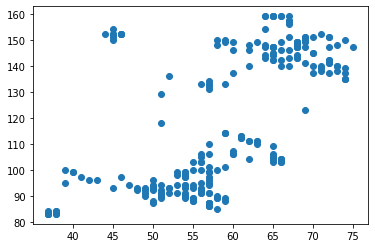

In [4]:
plt.scatter(data_std,data_mean)

In [5]:
# create kmeans object
kmeans = KMeans(n_clusters=5,max_iter= 500)
# fit kmeans object to data
kmeans.fit(data_mean,data_std)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(data_mean,data_std)
y_km

[[ 89.85333333]
 [151.08955224]
 [139.2       ]
 [112.875     ]
 [101.31914894]]


array([4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 3, 2, 4, 1, 2, 2,
       2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 1, 4, 3, 3, 3, 3, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 4, 3, 3, 2, 3, 1, 1, 2, 1,
       2, 4, 4, 4, 4, 4, 1, 1, 2, 2, 2, 2, 4, 1, 4, 1, 4, 1, 3, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 2, 4, 4, 4, 4,
       3, 2, 2, 2, 2, 2, 2, 3])

C:\Users\Erizka Banuwati C\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


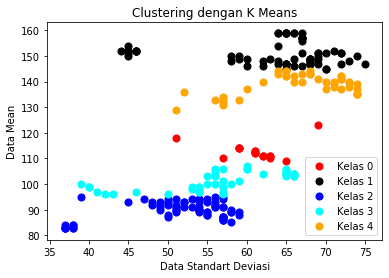

In [6]:
plt.ylabel("Data Mean")
plt.xlabel("Data Standart Deviasi")
plt.title ("Clustering dengan K Means")
ax = plt.subplot(111)
ax.scatter(data_std[y_km ==0], data_mean[y_km == 0], s=50, c='red', label= 'Kelas 0')
ax.scatter(data_std[y_km ==1], data_mean[y_km == 1], s=50, c='black', label= 'Kelas 1')
ax.scatter(data_std[y_km ==2], data_mean[y_km == 2], s=50, c='blue', label= 'Kelas 2')
ax.scatter(data_std[y_km ==3], data_mean[y_km == 3], s=50, c='cyan', label= 'Kelas 3')
ax.scatter(data_std[y_km ==4], data_mean[y_km == 4], s=50, c='orange', label= 'Kelas 4')
ax.legend()
plt.show()